In [1]:
from school_analysis.preprocessing.load import Loader
import pandas as pd

loader = Loader()

def load_special_edu_support_percentage():
    melted_df = loader.load('students_with_special_educational_support_no_gender')

    melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')
    melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')
    total_over_years = melted_df.groupby(['year','school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'total': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()


    merged_df = pd.merge(total_over_years, child_amount_per_year,on=['year','school'])
    merged_df['edu_support_relative'] = merged_df['total']/merged_df['Value'] 
    return merged_df

def load_repeaters_percentage():
    df_melted = loader.load('number_of_repeaters')

    df_melted = df_melted[df_melted['school']!="Special schools"] #Drop special schools because they have special effects
    
    df_melted['year'] = pd.to_datetime(df_melted['year'], format='%Y')
    df_melted['total'] = pd.to_numeric(df_melted['total'], errors='coerce')
    total_students_by_year = df_melted.groupby(['year', 'school'])['total'].sum()

    children_type = loader.load('school-children-by-type')
    children_type = children_type.rename(columns={'Year': 'year'})
    children_type = children_type.rename(columns={'School Type': 'school'})
    children_type = children_type.rename(columns={'total': 'Value'})
    children_type['year'] = pd.to_datetime(children_type['year'], format='%Y')
    children_type['Value'] = pd.to_numeric(children_type['Value'], errors='coerce')
    child_amount_per_year = children_type.groupby(['year','school'])['Value'].sum()

    merged_df = pd.merge(total_students_by_year, child_amount_per_year, on=['year','school'])
    merged_df['repeaters_relative'] = merged_df['total']/merged_df['Value'] 


    return merged_df

repeaters = load_repeaters_percentage()
special_edu_support = load_special_edu_support_percentage()

repeaters


KeyError: 'Column not found: Value'

In [ ]:
merged_df = pd.merge(repeaters, special_edu_support, on=['year','school'])
correlation_coefficient = merged_df['edu_support_relative'].corr(merged_df['repeaters_relative'])
correlation_coefficient

-0.02175034667791006

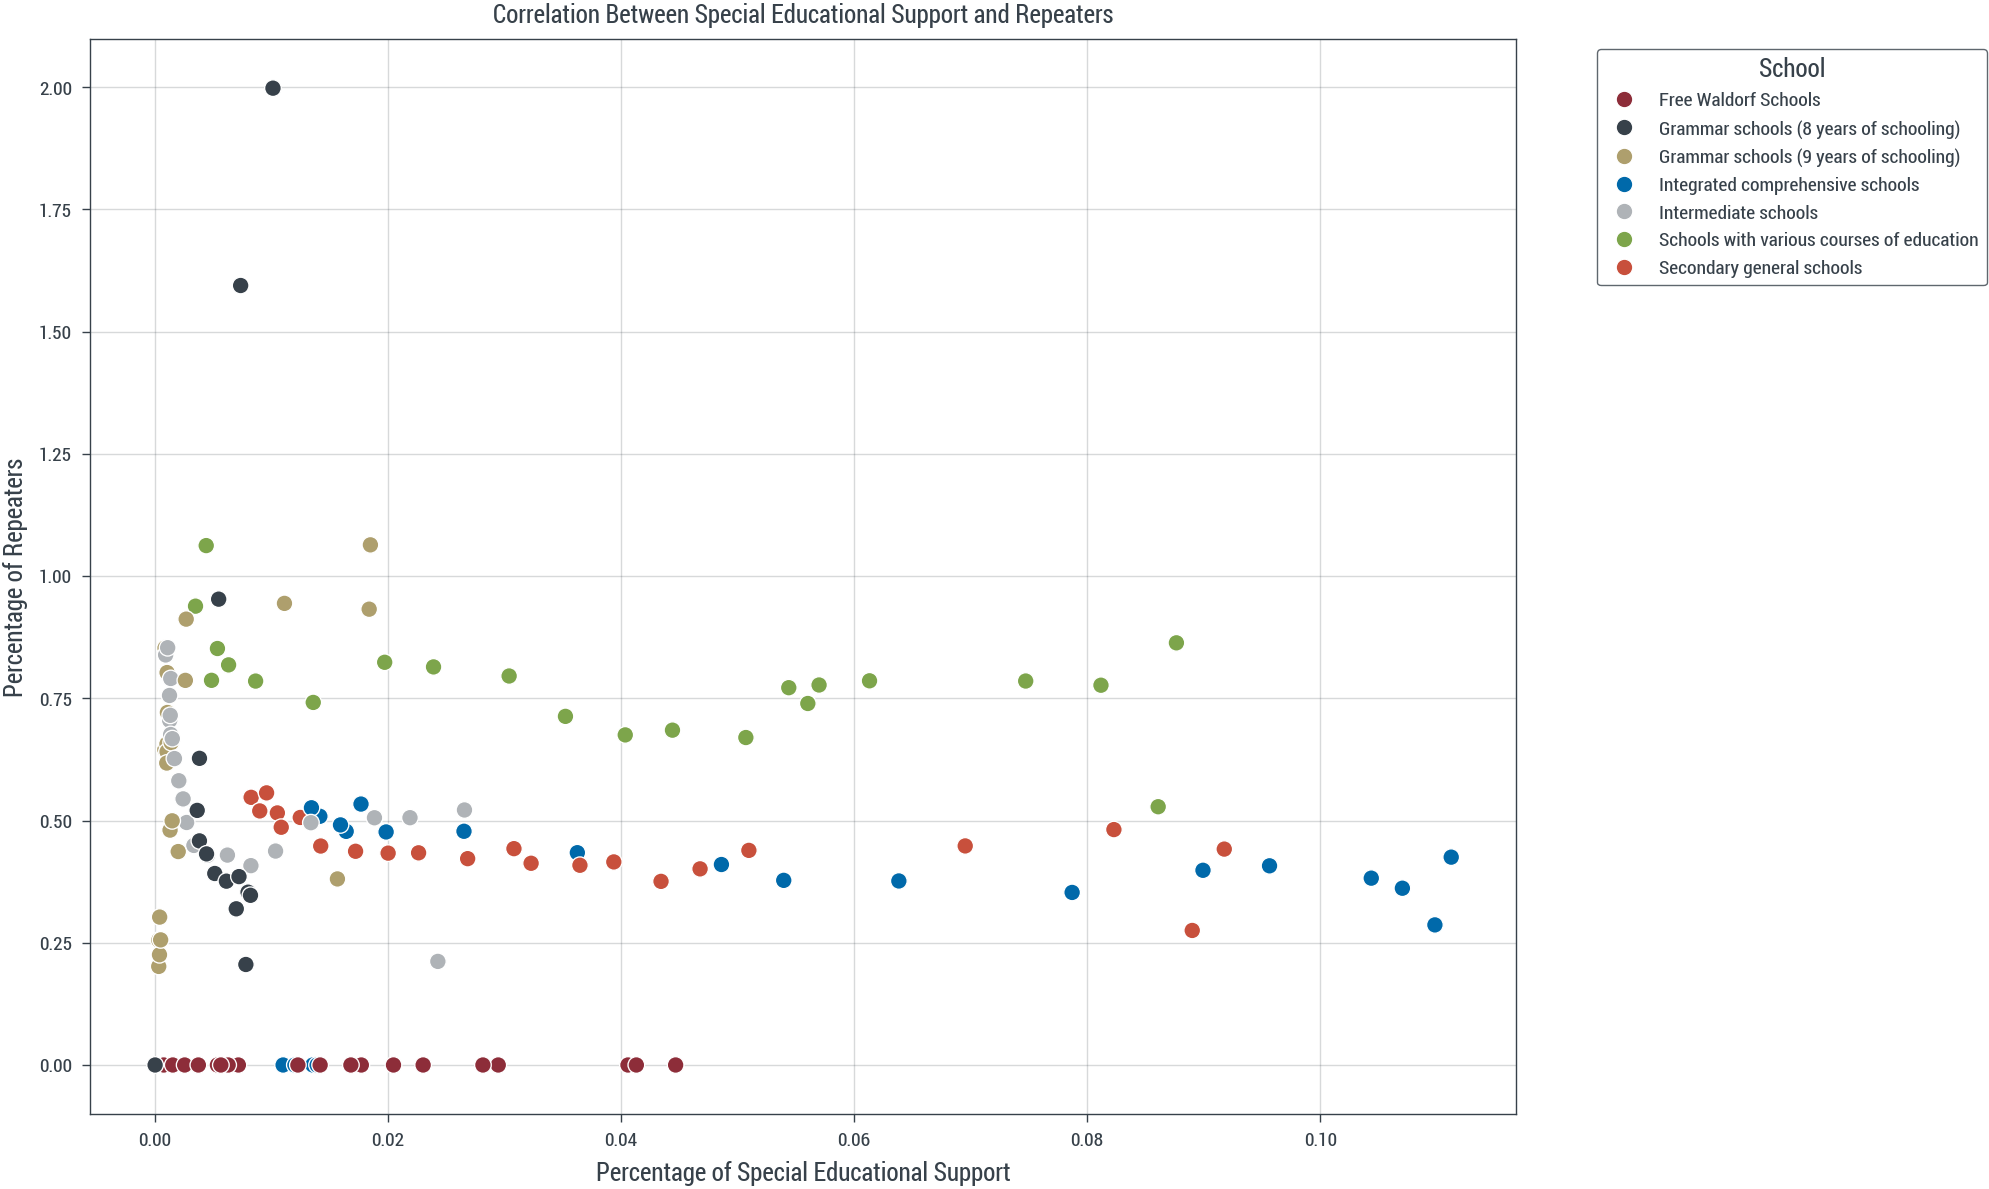

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='edu_support_relative', y='repeaters_relative', hue='school')
plt.title('Correlation Between Special Educational Support and Repeaters')
plt.xlabel('Percentage of Special Educational Support')
plt.ylabel('Percentage of Repeaters')
plt.legend(title='School', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()